In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score



In [2]:
label_mapping = {0: "Healthy", 1: "Parkinson's", 2: "Other Movement Disorder"}

In [4]:
df = pd.read_csv('../merged_df.csv')

In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [6]:
df.shape
df.columns
df.resource_type.unique()

array(['patient'], dtype=object)

In [7]:
df

,subject_id,study_id_x,questionnaire_name,questionnaire_id,01,02,03,04,05,06,...,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,appearance_in_first_grade_kinship,effect_of_alcohol_on_tremor,label
0,280,PADS,NMS,Non-motor Symptoms,False,False,True,False,True,False,...,73,77,162,65,female,right,False,NaN,Unknown,2
1,146,PADS,NMS,Non-motor Symptoms,False,True,False,False,False,False,...,68,71,186,89,male,right,True,False,Improvement,1
2,453,PADS,NMS,Non-motor Symptoms,False,False,False,False,False,False,...,0,48,164,59,female,right,False,False,Unknown,2
3,3,PADS,NMS,Non-motor Symptoms,False,False,False,False,False,False,...,45,45,170,78,female,right,False,NaN,Unknown,0
4,392,PADS,NMS,Non-motor Symptoms,True,False,True,False,False,False,...,48,55,165,64,female,right,False,NaN,Improvement,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,169,PADS,NMS,Non-motor Symptoms,False,False,False,False,True,False,...,51,56,180,82,female,right,True,True,Unknown,1
465,186,PADS,NMS,Non-motor Symptoms,True,False,True,True,True,False,...,60,65,160,73,female,right,False,NaN,No effect,1
466,352,PADS,NMS,Non-motor Symptoms,False,True,True,False,False,False,...,45,55,172,80,female,right,True,False,No effect,1
467,217,PADS,NMS,Non-motor Symptoms,True,False,False,False,False,False,...,65,73,182,85,male,right,False,NaN,No effect,1


In [8]:
data_clean = df.copy()
data_clean.columns

Index(['subject_id', 'study_id_x', 'questionnaire_name', 'questionnaire_id',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', 'resource_type', 'id', 'study_id_y',
       'condition', 'disease_comment', 'age_at_diagnosis', 'age', 'height',
       'weight', 'gender', 'handedness', 'appearance_in_kinship',
       'appearance_in_first_grade_kinship', 'effect_of_alcohol_on_tremor',
       'label'],
      dtype='object')

In [9]:
columns_to_drop = ['study_id_x', 'study_id_y',
                   'questionnaire_id', 'id',
                    'questionnaire_name', 'resource_type',
                    'appearance_in_first_grade_kinship',
                   'disease_comment', 'condition', 'effect_of_alcohol_on_tremor']

In [10]:
data_clean = data_clean.drop(columns= columns_to_drop)
data_clean

,subject_id,01,02,03,04,05,06,07,08,09,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,label
0,280,False,False,True,False,True,False,True,True,False,...,False,False,73,77,162,65,female,right,False,2
1,146,False,True,False,False,False,False,False,True,True,...,False,False,68,71,186,89,male,right,True,1
2,453,False,False,False,False,False,False,False,False,False,...,False,False,0,48,164,59,female,right,False,2
3,3,False,False,False,False,False,False,False,False,False,...,False,False,45,45,170,78,female,right,False,0
4,392,True,False,True,False,False,False,False,True,False,...,False,False,48,55,165,64,female,right,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,169,False,False,False,False,True,False,False,True,True,...,False,False,51,56,180,82,female,right,True,1
465,186,True,False,True,True,True,False,False,True,True,...,True,True,60,65,160,73,female,right,False,1
466,352,False,True,True,False,False,False,False,True,True,...,False,False,45,55,172,80,female,right,True,1
467,217,True,False,False,False,False,False,False,True,True,...,False,False,65,73,182,85,male,right,False,1


,subject_id,01,02,03,04,05,06,07,08,09,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,label
2,453,False,False,False,False,False,False,False,False,False,...,False,False,0,48,164,59,female,right,False,2
94,242,False,True,False,False,False,False,False,True,True,...,False,False,0,59,175,105,male,right,False,1
135,434,False,False,False,False,False,False,False,False,False,...,False,False,0,75,162,52,female,right,False,2
142,176,False,False,False,True,False,False,False,False,True,...,False,False,0,43,168,110,female,right,False,2
155,117,False,True,False,False,False,False,False,True,True,...,False,False,0,82,172,76,male,right,False,2
174,195,False,False,False,False,False,False,False,False,False,...,True,False,0,57,182,87,male,right,False,2
222,462,False,False,False,False,False,False,False,False,False,...,False,False,0,58,160,75,female,right,False,2
228,120,False,False,False,False,True,True,True,False,False,...,False,False,0,67,175,75,male,right,False,1
238,321,False,False,False,False,False,False,False,False,True,...,False,False,0,66,162,62,female,right,False,2
266,322,False,True,True,False,True,False,True,False,True,...,False,True,0,59,184,98,male,right,False,1


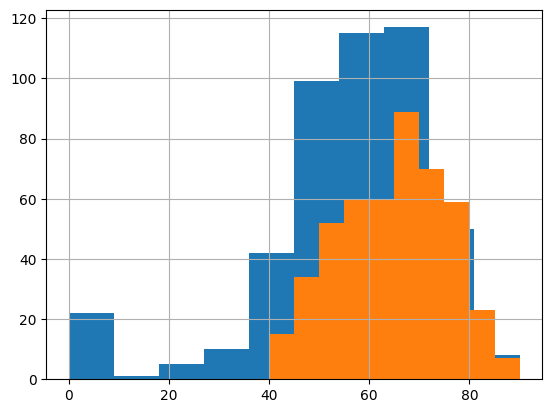

In [11]:
data_clean.age_at_diagnosis.hist()
data_clean.age.hist()
#data_clean[data_clean['age_at_diagnosis']==0,]
data_clean[data_clean['age_at_diagnosis']==0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  469 non-null    int64
 1   height  469 non-null    int64
dtypes: int64(2)
memory usage: 7.5 KB


<Axes: >

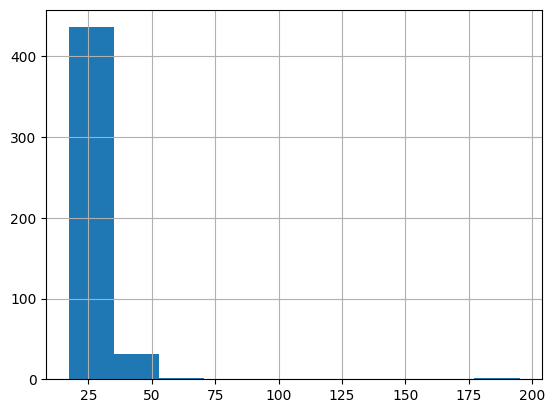

In [12]:
data_clean['bmi'] = (data_clean.weight)/((data_clean.height/100)**2)
data_clean.loc[:,['weight', 'height']].info()
data_clean.bmi.hist()

In [13]:
mask = data_clean['age_at_diagnosis']==0
data_clean.loc[mask,'age_at_diagnosis'] = data_clean.loc[mask,'age']

In [14]:
features = data_clean.drop(columns = ['subject_id','label']).columns
features
y = data_clean['label']

In [18]:
X = data_clean[features]

In [19]:
X

,01,02,03,04,05,06,07,08,09,10,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,bmi
0,False,False,True,False,True,False,True,True,False,True,...,False,False,73,77,162,65,female,right,False,24.767566
1,False,True,False,False,False,False,False,True,True,False,...,False,False,68,71,186,89,male,right,True,25.725517
2,False,False,False,False,False,False,False,False,False,False,...,False,False,48,48,164,59,female,right,False,21.936347
3,False,False,False,False,False,False,False,False,False,False,...,False,False,45,45,170,78,female,right,False,26.989619
4,True,False,True,False,False,False,False,True,False,True,...,False,False,48,55,165,64,female,right,False,23.507805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,False,False,False,False,True,False,False,True,True,False,...,False,False,51,56,180,82,female,right,True,25.308642
465,True,False,True,True,True,False,False,True,True,False,...,True,True,60,65,160,73,female,right,False,28.515625
466,False,True,True,False,False,False,False,True,True,True,...,False,False,45,55,172,80,female,right,True,27.041644
467,True,False,False,False,False,False,False,True,True,False,...,False,False,65,73,182,85,male,right,False,25.661152


<Axes: >

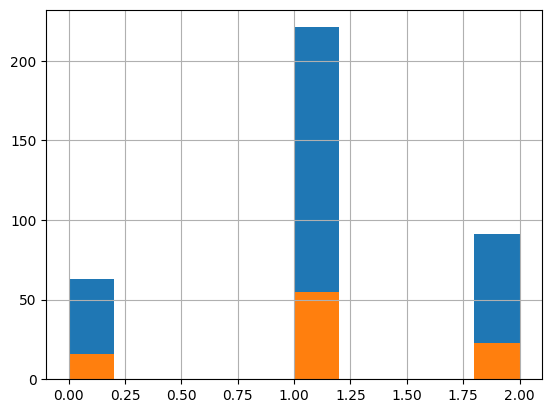

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42, stratify = y)
y_train.hist()
y_test.hist()

In [22]:
X_train.shape
X_train.columns = features
X_train.head()

,01,02,03,04,05,06,07,08,09,10,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,bmi
53,False,True,False,False,False,False,False,False,False,True,...,True,False,52,62,185,111,male,right,False,32.432432
15,True,False,True,False,False,False,False,True,False,False,...,False,False,54,58,170,63,female,right,False,21.799308
273,False,False,False,False,False,False,False,False,False,False,...,False,False,68,68,180,88,male,right,False,27.160494
125,False,False,False,False,True,False,False,True,True,False,...,False,False,68,75,176,69,male,right,True,22.275310
35,True,True,True,False,True,True,False,True,True,False,...,False,False,46,54,191,98,male,left,False,26.863299


In [23]:
X_test.columns = features

In [24]:
X_test

,01,02,03,04,05,06,07,08,09,10,...,29,30,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,bmi
294,False,False,True,False,False,False,False,True,True,False,...,False,False,81,81,184,84,male,right,False,24.810964
115,True,True,True,True,True,False,True,True,True,True,...,False,False,47,51,188,120,male,right,False,33.952014
45,False,False,False,False,True,False,False,True,False,True,...,False,False,67,72,183,97,male,right,True,28.964735
250,True,True,True,True,True,True,True,True,True,True,...,False,False,65,70,183,112,male,right,False,33.443817
16,True,False,True,False,True,False,True,True,False,False,...,False,False,59,64,158,69,female,left,False,27.639801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,True,True,True,True,False,False,False,False,True,True,...,False,False,59,65,163,103,female,right,False,38.766984
176,True,True,True,False,True,False,True,True,False,True,...,False,False,60,65,183,95,male,right,False,28.367524
77,False,False,False,False,False,False,False,False,True,False,...,False,False,53,56,190,102,male,right,True,28.254848
373,False,False,False,True,False,False,False,False,True,False,...,False,False,62,62,157,89,female,right,False,36.106941


In [20]:
encoder = OneHotEncoder(drop = 'if_binary')
r_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [27]:
data_to_rscale = ['age_at_diagnosis', 'age', 'height', 'weight']
data_to_mmscale = ['bmi']
data_to_encode = X.drop(columns = ['age_at_diagnosis', 'age',
                                            'height', 'weight','bmi']).columns
column_prep = ColumnTransformer(transformers=[
        ("robust", r_scaler, data_to_rscale),
        ("mm", mm_scaler, data_to_mmscale),
        ("enc",encoder, data_to_encode)
    ])

In [28]:
X_train_prep= column_prep.fit_transform(X_train[features])

In [29]:
X_train_prep

array([[-0.41176471, -0.23529412,  0.91666667, ...,  1.        ,
         1.        ,  0.        ],
       [-0.29411765, -0.47058824, -0.33333333, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.52941176,  0.11764706,  0.5       , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.94117647,  0.52941176, -0.08333333, ...,  1.        ,
         1.        ,  0.        ],
       [-0.05882353, -0.47058824, -0.66666667, ...,  0.        ,
         1.        ,  0.        ],
       [-0.47058824, -0.76470588, -0.91666667, ...,  0.        ,
         1.        ,  0.        ]], shape=(375, 38))

In [30]:
X_test_prep = column_prep.transform(X_test)

In [31]:
X_test_prep

array([[ 1.29411765,  0.88235294,  0.83333333, ...,  1.        ,
         1.        ,  0.        ],
       [-0.70588235, -0.88235294,  1.16666667, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.47058824,  0.35294118,  0.75      , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.35294118, -0.58823529,  1.33333333, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.17647059, -0.23529412, -1.41666667, ...,  0.        ,
         1.        ,  0.        ],
       [-1.11764706, -1.52941176,  0.75      , ...,  0.        ,
         1.        ,  1.        ]], shape=(94, 38))

Baseline Model - Support Vector Machine - SVC

In [35]:
model = SVC(kernel='rbf', C=10)

In [36]:
model.fit(X_train_prep, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [40]:
cv_scores = cross_validate(
    model, X_train_prep, y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring='balanced_accuracy'
)

In [41]:
cv_scores

{'fit_time': array([0.01637983, 0.00688004, 0.00715804, 0.00835824, 0.00779915]),
 'score_time': array([0.01219988, 0.00648499, 0.00586104, 0.00504804, 0.0050478 ]),
 'test_score': array([0.57037037, 0.59233359, 0.47073297, 0.61039886, 0.64792663])}

In [49]:
baseline_score1 = float(cv_scores['test_score'].mean())

In [50]:
baseline_score1

0.5783524857209068

GridSearch for better params

In [51]:
model.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [52]:
grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100, 1000]
}



In [54]:
search = GridSearchCV(
    model,
    grid,
    scoring='balanced_accuracy',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1
)

In [55]:
search.fit(X_train_prep,y_train)

,estimator,SVC(C=10)
,param_grid,"{'C': [0.1, 1, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [56]:
search.best_score_

np.float64(0.6493328698591857)

In [57]:
search.best_params_


{'C': 1, 'kernel': 'linear'}

In [58]:
best_model = search.best_estimator_

In [60]:
y_pred_best = best_model.predict(X_test_prep)

In [61]:
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_best)

In [62]:
balanced_accuracy

0.7022068511198946